In [72]:
import pandas as pd
import numpy as np
import plotnine
from plotnine import ggplot, aes, geom_point, geom_bar, facet_wrap, geom_col, coord_flip, labs, theme_bw, geom_smooth


In [2]:
df = pd.read_csv(r"C:\Users\manue\OneDrive\Escritorio\Ironhack\Proyectos\Visualizacion\Spain.csv")

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides_100k/hab,country_year,gdp_for_year,gdp_per_capita,generation,idh,ranking_idh
0,Spain,1990,male,75+ years,404.0,785000,51.46,Spain1990,5.351012e+11,14517.0,G.I. Generation,"0,757",26º
1,Spain,1990,male,55-74 years,666.0,3421900,19.46,Spain1990,5.351012e+11,14517.0,G.I. Generation,"0,757",26º
2,Spain,1990,female,75+ years,175.0,1359100,12.88,Spain1990,5.351012e+11,14517.0,G.I. Generation,"0,757",26º
3,Spain,1990,male,25-34 years,325.0,3053500,10.64,Spain1990,5.351012e+11,14517.0,Boomers,"0,757",26º
4,Spain,1990,male,35-54 years,481.0,4525600,10.63,Spain1990,5.351012e+11,14517.0,Silent,"0,757",26º


In [88]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100k/hab', 'country_year', 'gdp_for_year', 'gdp_per_capita',
       'generation', 'idh', 'ranking_idh'],
      dtype='object')

## Transformaciones

In [19]:
df.age.unique()

array(['75+ years', '55-74 years', '25-34 years', '35-54 years',
       '15-24 years', '5-14 years'], dtype=object)

In [ ]:
['75+ years', '55-74 years', '25-34 years', '35-54 years',
       '15-24 years', '5-14 years']



In [21]:
#Para convertir en categorical edad y que los datos se presenten de manera ordenada
df.age = pd.Categorical(
    df.age, categories = ['5-14 years', '15-24 years','25-34 years','35-54 years', '55-74 years', '75+ years'])

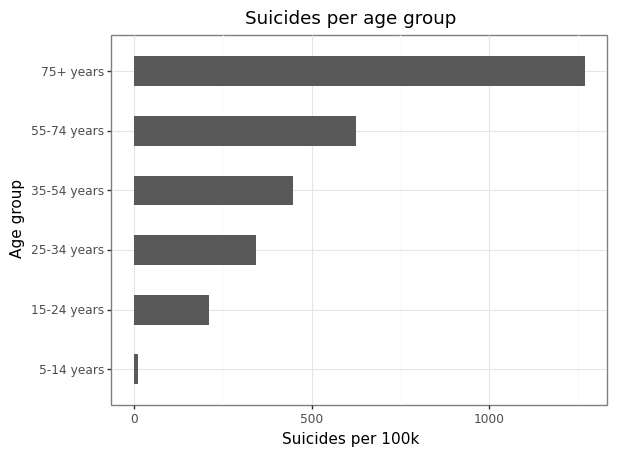

<ggplot: (116214487034)>

In [28]:
#Grafico de barra de suicidios por grupos de edad 
(
    ggplot(df, aes("age", "suicides_100k/hab"))
    + geom_col(width=.5)
    + coord_flip()
    + labs(x= 'Age group', y = 'Suicides per 100k', title = 'Suicides per age group')
    + theme_bw()
)

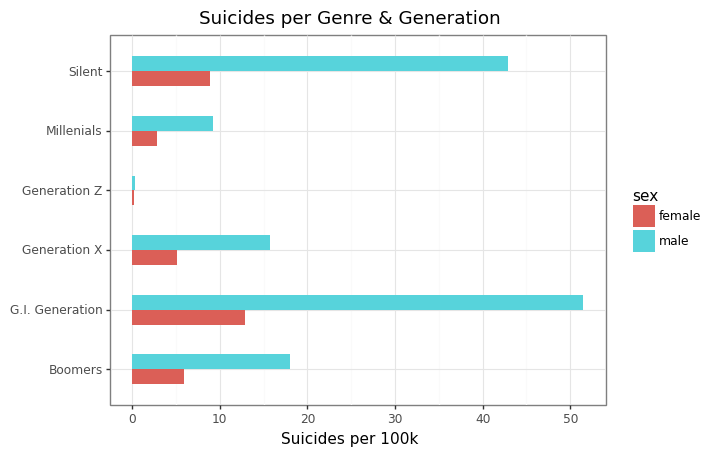

<ggplot: (116214403506)>

In [85]:
(
    ggplot(df, aes(x="generation", y="suicides_100k/hab",fill = 'sex' ))
    + geom_col(width=.5, position= 'dodge')
    + coord_flip()
    + labs(x= '', y = 'Suicides per 100k', title = 'Suicides per Genre & Generation')
    + theme_bw()
)

In [69]:
df_2 = df.groupby('year', as_index = False).agg({'gdp_per_capita': 'mean', 'suicides_100k/hab': 'mean'})
df_2 = df_2[df_2.year<2017]

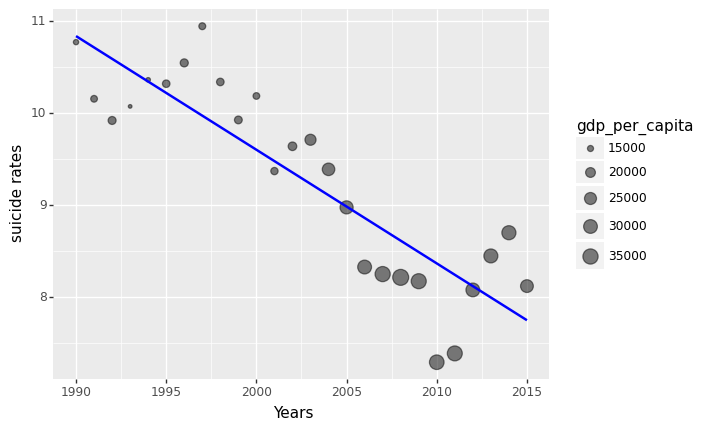

<ggplot: (116214690295)>

In [84]:
(
    ggplot(df_2, aes(x="year", y="suicides_100k/hab"))
    + geom_point(aes(size = "gdp_per_capita"), alpha = .5)
    + geom_smooth(method = "lm", se = False, color = "blue")
    + labs(x= 'Years', y= 'suicide rates')
)

In [112]:
df_4 = df.groupby(['year'], as_index = False).agg({'suicides_no': 'sum'})

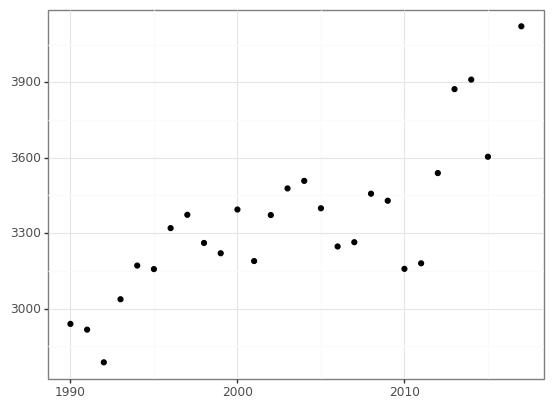

<ggplot: (116214658347)>

In [124]:
(
    ggplot(df_4, aes(x="suicides_no", y="year"))
    + geom_point()
    + coord_flip()
    + labs(x= '', y = '', title = '')
    + theme_bw()
)

In [114]:
df_3 = df.groupby(['year','sex'], as_index = False).agg({'suicides_no': 'sum'})


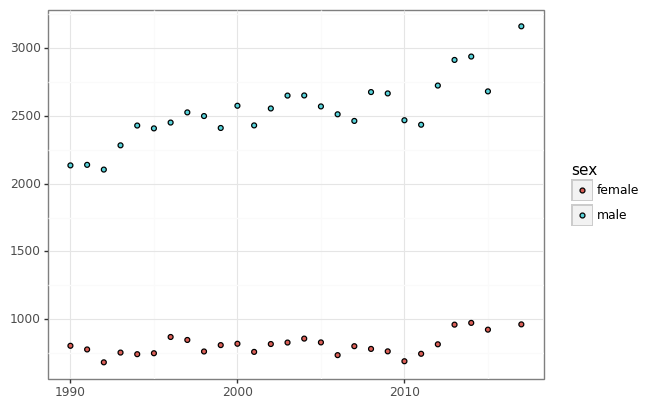

<ggplot: (116214216394)>

In [122]:
(
    ggplot(df_3, aes(x="year", y="suicides_no",fill = 'sex' ))
    + geom_point()
    + labs(x= '', y = '', title = '')
    + theme_bw()
)